In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, \
f1_score, ndcg_score, precision_score, average_precision_score, precision_recall_curve

In [3]:
results = np.load('prediction_result.npz')
results['y_true'], results['y_pred']

(array([1, 1, 1, ..., 0, 0, 0]),
 array([0.3781182 , 0.81640273, 0.76810426, ..., 0.05464197, 0.0491982 ,
        0.04193938], dtype=float32))

In [11]:
y_true = results['y_true']
y_pred = results['y_pred']

sorted_ind = np.argsort(y_pred)[::-1]
sorted_y_true = y_true[sorted_ind]
ind = 11897
       
sorted_y_pred = np.zeros_like(sorted_y_true)


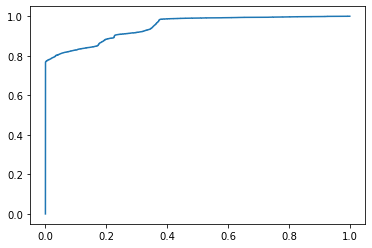

(array([0.01673209, 0.01682208, 0.01683905, ..., 0.9876602 , 0.987672  ,
        0.9878594 ], dtype=float32),
 array([1, 1, 1, ..., 0, 0, 0]))

In [12]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
np.savez('GAT_roc_curve.npz', fpr=fpr, tpr=tpr, thresholds=thresholds)
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
np.savez('GAT_pr_curve.npz', precision=precision, recall=recall, thresholds=thresholds)
plt.plot(fpr, tpr)
plt.show()
sorted_y_pred = np.zeros_like(sorted_y_true)
for i in range (ind):
    if(y_pred[i] >= thresholds[i]):
       sorted_y_pred[i] = 1
thresholds,sorted_y_pred,

In [14]:
auc = roc_auc_score(y_true, y_pred)
precision = average_precision_score(y_true, y_pred)
acc = accuracy_score(y_true, sorted_y_pred)
recall = recall_score(y_true, sorted_y_pred)
f1value = 2*acc*recall/(acc+recall)
auc,precision,acc,recall,f1value

(0.9477602246233879,
 0.9577652292627743,
 0.9329995413545329,
 0.8659990827090659,
 0.898251656419767)